In [ ]:
pip install tensorflow

In [1]:


# #Pretrained model on ImageNet
from tensorflow import keras

base_model = keras.applications.MobileNetV2(
     weights='imagenet',
     input_shape=(224, 224, 3),
     include_top=False)

In [2]:
# Freeze base model
base_model.trainable = False


In [3]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)


# Add final dense layer
outputs = keras.layers.Dense(5, activation = 'softmax')(x)


# Combine inputs and outputs to create model
model = keras.Model(inputs,outputs)


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
# compile the model with loss and metrics options
model.compile(loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [7]:
#Augment the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) # randomnly flip images

In [8]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('C:/Users/jeetp/train', 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('C:/Users/jeetp/test', 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 603 images belonging to 5 classes.
Found 124 images belonging to 5 classes.


Epoch 1/5
18/18 [==============================] - 20s 994ms/step - loss: 1.6088 - accuracy: 0.3284 - val_loss: 1.4732 - val_accuracy: 0.4113
Epoch 2/5
18/18 [==============================] - 17s 908ms/step - loss: 1.1978 - accuracy: 0.5091 - val_loss: 1.0762 - val_accuracy: 0.5565
Epoch 3/5
18/18 [==============================] - 18s 972ms/step - loss: 1.0601 - accuracy: 0.5837 - val_loss: 0.9826 - val_accuracy: 0.5806
Epoch 4/5
18/18 [==============================] - 36s 2s/step - loss: 1.0057 - accuracy: 0.5837 - val_loss: 1.0698 - val_accuracy: 0.5484
Epoch 5/5
18/18 [==============================] - 20s 1s/step - loss: 0.9201 - accuracy: 0.6385 - val_loss: 0.9700 - val_accuracy: 0.6613


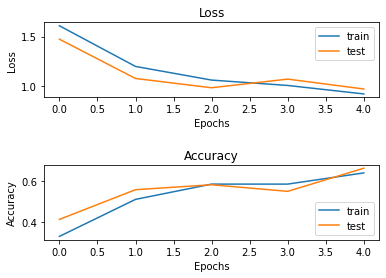

In [9]:
history = model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/32,
          validation_steps=valid_it.samples/32,
          epochs=5)

import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.subplots_adjust(hspace=0.9)

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')

pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Epoch 1/30
18/18 [==============================] - 18s 996ms/step - loss: 0.6751 - accuracy: 0.7268 - val_loss: 0.9010 - val_accuracy: 0.6146
Epoch 2/30
18/18 [==============================] - 16s 921ms/step - loss: 0.6388 - accuracy: 0.7916 - val_loss: 0.8108 - val_accuracy: 0.7188
Epoch 3/30
18/18 [==============================] - 16s 917ms/step - loss: 0.5974 - accuracy: 0.7671 - val_loss: 0.8852 - val_accuracy: 0.6458
Epoch 4/30
18/18 [==============================] - 16s 903ms/step - loss: 0.6300 - accuracy: 0.7426 - val_loss: 0.7953 - val_accuracy: 0.6771
Epoch 5/30
18/18 [==============================] - 17s 972ms/step - loss: 0.6078 - accuracy: 0.7618 - val_loss: 0.8072 - val_accuracy: 0.7083
Epoch 6/30
18/18 [==============================] - 17s 938ms/step - loss: 0.6197 - accuracy: 0.7566 - val_loss: 0.6836 - val_accuracy: 0.7708
Epoch 7/30
18/18 [==============================] - 16s 880ms/step - loss: 0.6433 - accuracy: 0.7548 - val_loss: 0.8061 - val_accuracy: 0.6979

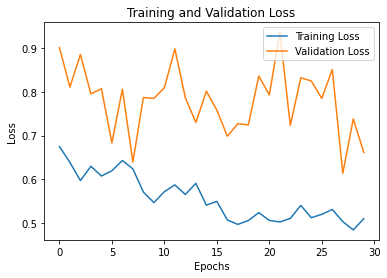

In [10]:
import matplotlib.pyplot as plt

# Train the MobileNetV2 model and store the history
history = model.fit(train_it,
                    validation_data=valid_it,
                    steps_per_epoch=train_it.samples // train_it.batch_size,
                    validation_steps=valid_it.samples // valid_it.batch_size,
                    epochs=30)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/30
18/18 [==============================] - 17s 965ms/step - loss: 0.4792 - accuracy: 0.8179 - val_loss: 0.7071 - val_accuracy: 0.7708
Epoch 2/30
18/18 [==============================] - 16s 880ms/step - loss: 0.4737 - accuracy: 0.8179 - val_loss: 0.8268 - val_accuracy: 0.7188
Epoch 3/30
18/18 [==============================] - 16s 897ms/step - loss: 0.4900 - accuracy: 0.8056 - val_loss: 0.8035 - val_accuracy: 0.7604
Epoch 4/30
18/18 [==============================] - 16s 896ms/step - loss: 0.4483 - accuracy: 0.8354 - val_loss: 0.6550 - val_accuracy: 0.7500
Epoch 5/30
18/18 [==============================] - 15s 851ms/step - loss: 0.4759 - accuracy: 0.8231 - val_loss: 0.7580 - val_accuracy: 0.7604
Epoch 6/30
18/18 [==============================] - 16s 909ms/step - loss: 0.4679 - accuracy: 0.8074 - val_loss: 0.6404 - val_accuracy: 0.7708
Epoch 7/30
18/18 [==============================] - 16s 894ms/step - loss: 0.4637 - accuracy: 0.8196 - val_loss: 0.6662 - val_accuracy: 0.7396

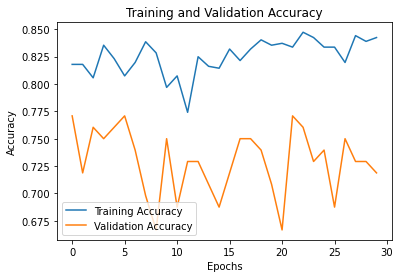

In [11]:
import matplotlib.pyplot as plt

# Train the MobileNetV2 model and store the history
history = model.fit(train_it,
                    validation_data=valid_it,
                    steps_per_epoch=train_it.samples // train_it.batch_size,
                    validation_steps=valid_it.samples // valid_it.batch_size,
                    epochs=30)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [12]:
accuracy = model.evaluate(valid_it)[1]
print(f"Accuracy: {accuracy}")


4/4 [==============================] - 11s 2s/step - loss: 0.7349 - accuracy: 0.7339
Accuracy: 0.7338709831237793


In [15]:
accuracy = model.evaluate(train_it)[1]
print(f"Accuracy: {accuracy}")


19/19 [==============================] - 14s 731ms/step - loss: 0.3927 - accuracy: 0.8607
Accuracy: 0.8606964945793152


In [13]:
loss = model.evaluate(valid_it)[0]
print(f"Loss: {loss}")


4/4 [==============================] - 11s 3s/step - loss: 0.8102 - accuracy: 0.7419
Loss: 0.8102480173110962


In [14]:
loss = model.evaluate(train_it)[0]
print(f"Loss: {loss}")

19/19 [==============================] - 14s 702ms/step - loss: 0.3924 - accuracy: 0.8557
Loss: 0.3923560082912445


In [16]:
from sklearn.metrics import roc_auc_score, mean_absolute_error

# Assuming you have the number of classes stored in `num_classes`
num_classes = 5

# Get predictions for the validation data
y_pred = model.predict(valid_it)

# Convert one-hot encoded labels to categorical labels for y_true
y_true = valid_it.classes

# ROC AUC
roc_auc_scores = []
for class_idx in range(num_classes):
    class_true = (y_true == class_idx).astype(int)
    class_pred = y_pred[:, class_idx]
    roc_auc = roc_auc_score(class_true, class_pred)
    roc_auc_scores.append(roc_auc)

print("ROC AUC Scores:", roc_auc_scores)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, y_pred.argmax(axis=1))
print("MAE:", mae)


4/4 [==============================] - 4s 937ms/step
ROC AUC Scores: [0.5033333333333333, 0.5056179775280899, 0.5219907407407407, 0.5090266875981162, 0.4713732242789496]
MAE: 1.5564516129032258


4/4 [==============================] - 3s 771ms/step


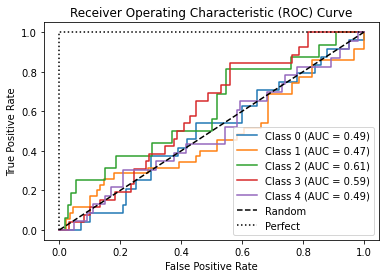

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, mean_absolute_error

# Assuming you have the number of classes stored in `num_classes`
num_classes = 5

# Get predictions for the validation data
y_pred = model.predict(valid_it)

# Convert one-hot encoded labels to categorical labels for y_true
y_true = valid_it.classes

# Calculate ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for class_idx in range(num_classes):
    fpr[class_idx], tpr[class_idx], _ = roc_curve((y_true == class_idx).astype(int), y_pred[:, class_idx])
    roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])

# Calculate the macro-average ROC AUC
macro_roc_auc = np.mean(list(roc_auc.values()))

# Plot ROC curve for each class
plt.figure()
for class_idx in range(num_classes):
    plt.plot(fpr[class_idx], tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, roc_auc[class_idx]))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot([0, 0, 1], [0, 1, 1], 'k:', label='Perfect')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [21]:
print("ROC AUC Scores:", roc_auc_scores)

ROC AUC Scores: [0.5033333333333333, 0.5056179775280899, 0.5219907407407407, 0.5090266875981162, 0.4713732242789496]


In [19]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, np.argmax(y_pred, axis=1))
print("MAE:", mae)

MAE: 1.7016129032258065


In [36]:
# Calculate train accuracy
train_accuracy = model.evaluate(train_it)[1]
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = model.evaluate(valid_it)[1]
print("Test Accuracy:", test_accuracy)


19/19 [==============================] - 13s 704ms/step - loss: 0.6507 - accuracy: 0.7446
Train Accuracy: 0.7446103096008301
4/4 [==============================] - 4s 941ms/step - loss: 0.8639 - accuracy: 0.6935
Test Accuracy: 0.6935483813285828


4/4 [==============================] - 4s 833ms/step


NameError: name 'itertools' is not defined

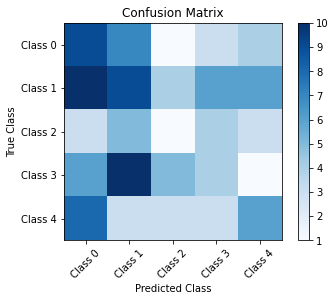

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get predictions for the test data
y_pred = model.predict(valid_it)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to categorical labels for y_true
y_true = valid_it.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']  # Replace with your actual class labels

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add the actual counts in each cell
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


Epoch 1/10
18/18 [==============================] - 19s 1s/step - loss: 0.4798 - accuracy: 0.8177 - val_loss: 0.9228 - val_accuracy: 0.6875
Epoch 2/10
18/18 [==============================] - 18s 994ms/step - loss: 0.4128 - accuracy: 0.8371 - val_loss: 0.8511 - val_accuracy: 0.6875
Epoch 3/10
18/18 [==============================] - 19s 1s/step - loss: 0.4465 - accuracy: 0.8196 - val_loss: 0.7391 - val_accuracy: 0.7396
Epoch 4/10
18/18 [==============================] - 19s 1s/step - loss: 0.4433 - accuracy: 0.8424 - val_loss: 0.8515 - val_accuracy: 0.7396
Epoch 5/10
18/18 [==============================] - 18s 993ms/step - loss: 0.4398 - accuracy: 0.8406 - val_loss: 0.6966 - val_accuracy: 0.7500
Epoch 6/10
18/18 [==============================] - 20s 1s/step - loss: 0.4354 - accuracy: 0.8284 - val_loss: 0.6068 - val_accuracy: 0.7292
Epoch 7/10
18/18 [==============================] - 20s 1s/step - loss: 0.4024 - accuracy: 0.8424 - val_loss: 0.7725 - val_accuracy: 0.7396
Epoch 8/10
18/

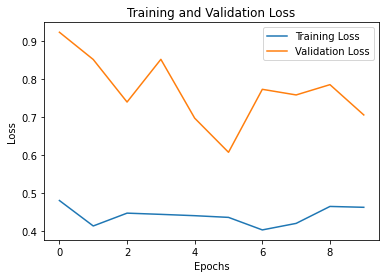

In [22]:
import matplotlib.pyplot as plt

# Train the MobileNetV2 model and store the history
history = model.fit(train_it,
                    validation_data=valid_it,
                    steps_per_epoch=train_it.samples // train_it.batch_size,
                    validation_steps=valid_it.samples // valid_it.batch_size,
                    epochs=10)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


Epoch 1/10
18/18 [==============================] - 20s 1s/step - loss: 0.4120 - accuracy: 0.8634 - val_loss: 0.7897 - val_accuracy: 0.7292
Epoch 2/10
18/18 [==============================] - 18s 981ms/step - loss: 0.4668 - accuracy: 0.8284 - val_loss: 0.7388 - val_accuracy: 0.7188
Epoch 3/10
18/18 [==============================] - 18s 997ms/step - loss: 0.4046 - accuracy: 0.8529 - val_loss: 0.6998 - val_accuracy: 0.7500
Epoch 4/10
18/18 [==============================] - 18s 1s/step - loss: 0.3811 - accuracy: 0.8594 - val_loss: 0.6982 - val_accuracy: 0.7500
Epoch 5/10
18/18 [==============================] - 21s 1s/step - loss: 0.4074 - accuracy: 0.8476 - val_loss: 0.6977 - val_accuracy: 0.7292
Epoch 6/10
18/18 [==============================] - 19s 1s/step - loss: 0.4121 - accuracy: 0.8406 - val_loss: 0.6918 - val_accuracy: 0.7812
Epoch 7/10
18/18 [==============================] - 19s 1s/step - loss: 0.4241 - accuracy: 0.8564 - val_loss: 0.5727 - val_accuracy: 0.7812
Epoch 8/10
18/

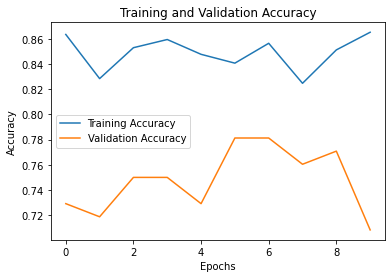

In [26]:
import matplotlib.pyplot as plt

# Train the MobileNetV2 model and store the history
history = model.fit(train_it,
                    validation_data=valid_it,
                    steps_per_epoch=train_it.samples // train_it.batch_size,
                    validation_steps=valid_it.samples // valid_it.batch_size,
                    epochs=10)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [27]:
accuracy = model.evaluate(train_it)[1]
print(f"Accuracy: {accuracy}")


19/19 [==============================] - 14s 748ms/step - loss: 0.4080 - accuracy: 0.8375
Accuracy: 0.837479293346405


In [28]:
accuracy = model.evaluate(valid_it)[1]
print(f"Accuracy: {accuracy}")


4/4 [==============================] - 3s 816ms/step - loss: 0.5882 - accuracy: 0.8065
Accuracy: 0.8064516186714172


In [29]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_true, np.argmax(y_pred, axis=1))
print("MAE:", mae)

MAE: 1.5564516129032258
